<a href="https://colab.research.google.com/github/FucsikovaTereza/Research_Project/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
url = 'https://github.com/FucsikovaTereza/Research_Project/raw/main/data.npz'
!wget -O data.npz {url}
!pip install tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

--2024-07-15 17:51:39--  https://github.com/FucsikovaTereza/Research_Project/raw/main/data.npz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FucsikovaTereza/Research_Project/main/data.npz [following]
--2024-07-15 17:51:39--  https://raw.githubusercontent.com/FucsikovaTereza/Research_Project/main/data.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2709755 (2.6M) [application/octet-stream]
Saving to: ‘data.npz’

data.npz            100%[===================>]   2.58M  --.-KB/s    in 0.06s   

2024-07-15 17:51:39 (41.8 MB/s) - ‘data.npz’ saved [2709755/2709755]



In [30]:
data = np.load('data.npz')
X = data['matrix']
y = data['labels']

print("Features size:", X.shape)
print("Labels size:", y.shape)

Features size: (56160, 12)
Labels size: (56160,)


In [31]:
# Split the data into training+validation and test sets (80% train+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (33696, 12)
Validation set size: (11232, 12)
Test set size: (11232, 12)


100%|██████████| 50/50 [02:29<00:00,  2.99s/it]


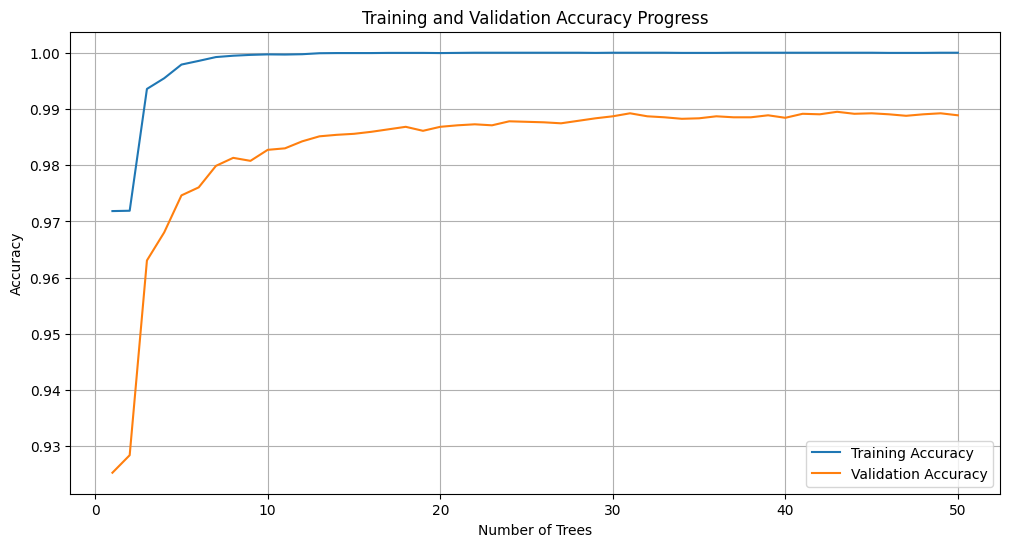

Validation Accuracy: 0.9888710826210826
Test Accuracy: 0.9901175213675214


In [32]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Lists to store accuracies
train_accuracies = []
val_accuracies = []

# Train the model with progress bar and track accuracies
for i in tqdm(range(1, rf_model.n_estimators + 1)):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_train, y_train)

    # Calculate training accuracy
    y_train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy
    y_val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Progress')
plt.legend()
plt.grid(True)
plt.show()

print("Validation Accuracy:", val_accuracy)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Feature ranking:
1. feature 10 (0.12533827427512748) - Pitch
2. feature 1 (0.12031367487730761) - cervical_spine_angle
3. feature 8 (0.11270141971835204) - eye_ear_dist
4. feature 0 (0.08987828481586038) - shoulders_inclination
5. feature 9 (0.08581078973144447) - Roll
6. feature 2 (0.08417371916978467) - right_shoulder_world Z
7. feature 11 (0.0760437765428334) - Yaw
8. feature 3 (0.07315508476942385) - left_shoulder_world Z
9. feature 5 (0.0703326872446664) - left_eye_outer_world Z
10. feature 4 (0.060862838768894326) - right_eye_outer_world Z
11. feature 7 (0.052772490409709466) - left_wrist_world Z
12. feature 6 (0.048616959676595996) - right_wrist_world Z


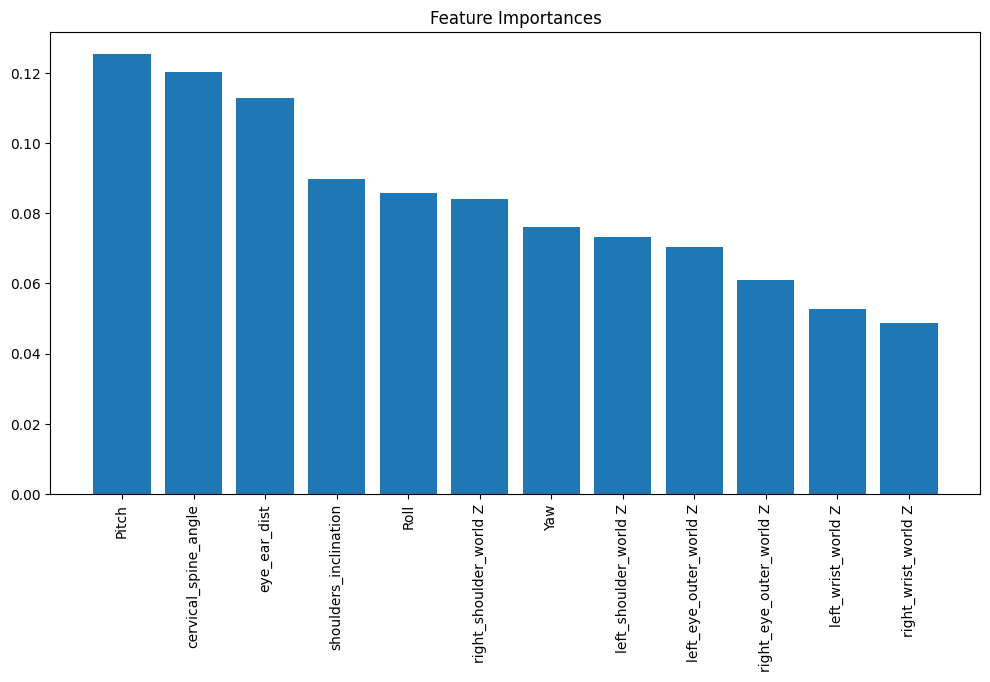

In [33]:
# Define the feature names
feature_names = [
    "shoulders_inclination", "cervical_spine_angle", "right_shoulder_world Z",
    "left_shoulder_world Z", "right_eye_outer_world Z", "left_eye_outer_world Z",
    "right_wrist_world Z", "left_wrist_world Z", "eye_ear_dist",
    "Roll", "Pitch", "Yaw"
]

# Compute feature importances
feature_importances = rf_model.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({feature_importances[indices[f]]}) - {feature_names[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()